# <h1 align=center><font size = 5><em>Unemployment Data Analysis</em>-Gauteng South Africa Analysis</font></h1>

## 1-Introduction

- The name Gauteng is derived from the Sotho name, gauta meaning "gold" with the locative suffix -There was a thriving gold industry in the province following the 1886 discovery of gold in Johannesburg. In Sesotho, the name Gauteng was used for Johannesburg and surrounding areas long before it was adopted in 1994 as the official name of a province.  
- Gauteng is smallest in area but most populated and commercialy busiest province of South Africa.It is divided in 10 Muncipilities.  
- Unemplyement rate of Youth in South Africa is continously on rise (Highest in world i-e 26.6%) and causing huge frustration among youths.
- Unemployment is the paint point and major matter of concern for current Govt.

We will analyse muncipility wise details of different factors to analyse the reason of unemployment in Youth
- Youth Education Details
- Geographical Distribution through Foursquare
- Conclude Major factor from available Data  
## Below will be intended audience of this report
-Public/Private sectors working to curb unemployment
-Unemployed Youth
-Non Govt/Non Profit organization to help youth in employment

In [41]:
# Lets start by importing all the modules and declaring the global variables
import pandas as pd
import numpy as np
import folium # map rendering library
import requests
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
pd.set_option('display.max_colwidth', -1)
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


## 2-Data Collection
### We will use below reffernces for data 

- Gauteng Muncipility wise Youth Data downloaded from https://youthexplorer.org.za/profiles/country-ZA-south-africa  &  
http://www.statssa.gov.za

- Foursquare Developers Access to venue data: https://foursquare.com/

### Data Utilization
- Downloaded data for Youth will be used to analyse Education,Unemployment ditribution of youth among all muncipilities of Gauteng Province.
- Foursquare data will be used to explore the neighbourhood facilities where different educated classes may be employed.

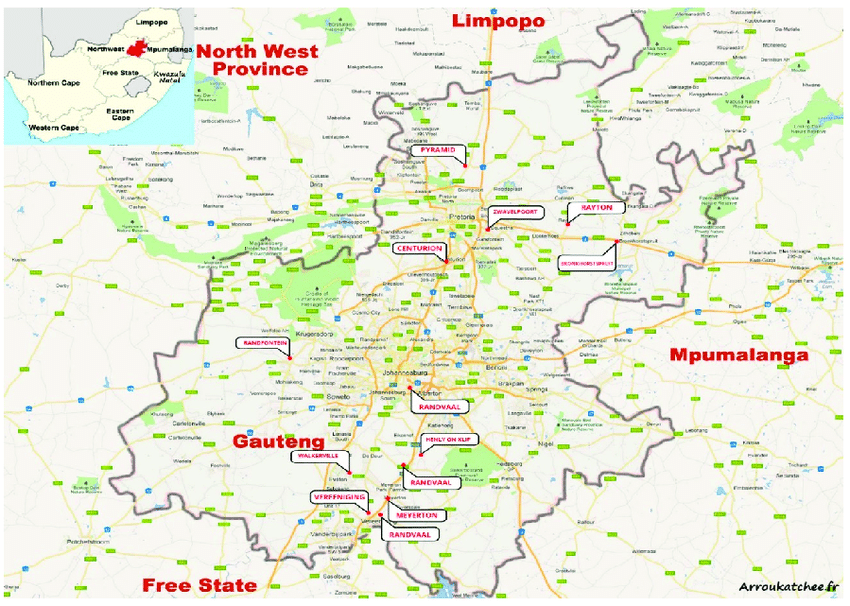

In [42]:
from IPython.display import Image
from IPython.core.display import HTML

Image("Map-of-Gauteng-Province-showing-farming-areas-of-interest-in-this-study-as-identified-by.png")

In [3]:
!conda install -c conda-forge xlrd --yes



Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-1.2.0                 |             py_0         108 KB  conda-forge

The following packages will be UPDATED:

    xlrd: 1.1.0-py37_1 --> 1.2.0-py_0 conda-forge


xlrd-1.2.0           | 108 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:
#check Working directory address to load file
import os
cwd = os.getcwd()
cwd

'/resources/labs/DP0701EN'

# 1-Data Collection

In [43]:
df_jhb=pd.read_excel('JHB_youth_dataV2.xlsx')
df_jhb.head()

,geo_level,geo_code,geoid,name,Youth,%Discouraged work-seeker,%Employed,%Other not economically active,%Unemployed,%Any tertiary,...,%Matric/matric equivalent,Discouraged work-seeker,Employed,Other not economically active,Unemployed,Any tertiary,Grade 10/11,Grade 9,Less than Grade9,Matric/matric equivalent
0,municipality,JHB,municipality-JHB,City of Johannesburg,767190,4.098724,26.471669,46.299222,23.130385,4.658429,...,30.735020,31445,203088,355203,177454,35739,102088,15687,25595,235796
1,municipality,TSH,municipality-TSH,City of Tshwane,524204,3.803290,22.858849,51.640201,21.697660,6.499760,...,33.524544,19937,119827,270700,113740,34072,63820,12324,18611,175737
2,municipality,EKU,municipality-EKU,Ekurhuleni,564111,4.363680,23.037310,47.585670,25.013340,4.059130,...,28.925513,24616,129956,268436,141103,22898,78277,12738,18500,163172
3,municipality,GT421,municipality-GT421,Emfuleni,137855,4.120997,15.997243,55.686772,24.194987,4.642559,...,27.124878,5681,22053,76767,33354,6400,18094,2916,3849,37393
4,municipality,GT423,municipality-GT423,Lesedi,16976,5.342837,22.908812,52.226673,19.521678,3.999764,...,26.407870,907,3889,8866,3314,679,3579,803,740,4483


# 2-Data Cleaning

In [44]:
df_jhb.drop(['Discouraged work-seeker','Employed','Other not economically active','Unemployed','Any tertiary','Grade 10/11','Grade 9','Less than Grade9', 'Matric/matric equivalent'], axis=1, inplace=True)
df_jhb

,geo_level,geo_code,geoid,name,Youth,%Discouraged work-seeker,%Employed,%Other not economically active,%Unemployed,%Any tertiary,%Grade 10/11,%Grade 9,%Less than Grade9,%Matric/matric equivalent
0,municipality,JHB,municipality-JHB,City of Johannesburg,767190,4.098724,26.471669,46.299222,23.130385,4.658429,13.306743,2.044735,3.336201,30.735020
1,municipality,TSH,municipality-TSH,City of Tshwane,524204,3.803290,22.858849,51.640201,21.697660,6.499760,12.174650,2.350993,3.550335,33.524544
2,municipality,EKU,municipality-EKU,Ekurhuleni,564111,4.363680,23.037310,47.585670,25.013340,4.059130,13.876170,2.258066,3.279496,28.925513
3,municipality,GT421,municipality-GT421,Emfuleni,137855,4.120997,15.997243,55.686772,24.194987,4.642559,13.125385,2.115266,2.792064,27.124878
4,municipality,GT423,municipality-GT423,Lesedi,16976,5.342837,22.908812,52.226673,19.521678,3.999764,21.082705,4.730207,4.359095,26.407870
5,municipality,GT484,municipality-GT484,Merafong City,33221,4.671744,20.610457,50.471088,24.246711,3.196773,15.932693,3.557990,4.746997,17.868216
6,municipality,GT422,municipality-GT422,Midvaal,15038,3.703950,31.087911,48.284346,16.923793,4.747972,14.716053,4.668174,4.329033,31.526799
7,municipality,GT481,municipality-GT481,Mogale City,61202,4.060325,25.169112,49.111140,21.659423,4.360969,14.450508,2.906768,4.164897,29.347080
8,municipality,GT482,municipality-GT482,Randfontein,25431,3.885022,22.960167,50.049153,23.105658,3.059258,11.714050,3.137903,5.261295,28.488852
9,municipality,GT483,municipality-GT483,Westonaria,20140,5.009930,22.298908,44.806356,27.884806,1.410129,13.753724,3.674280,5.566038,24.995035


# 3-Data Preparation
- Geo locataing/applying coordinates of muncipilities

In [45]:
geolocator = Nominatim()
df_jhb['Muncipility_coord']= df_jhb['geoid'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df_jhb

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


,geo_level,geo_code,geoid,name,Youth,%Discouraged work-seeker,%Employed,%Other not economically active,%Unemployed,%Any tertiary,%Grade 10/11,%Grade 9,%Less than Grade9,%Matric/matric equivalent,Muncipility_coord
0,municipality,JHB,municipality-JHB,City of Johannesburg,767190,4.098724,26.471669,46.299222,23.130385,4.658429,13.306743,2.044735,3.336201,30.735020,"(-26.214795, 27.9194779166667)"
1,municipality,TSH,municipality-TSH,City of Tshwane,524204,3.803290,22.858849,51.640201,21.697660,6.499760,12.174650,2.350993,3.550335,33.524544,"(-25.59396825, 28.3027885844744)"
2,municipality,EKU,municipality-EKU,Ekurhuleni,564111,4.363680,23.037310,47.585670,25.013340,4.059130,13.876170,2.258066,3.279496,28.925513,"(-26.184765, 28.3210725460123)"
3,municipality,GT421,municipality-GT421,Emfuleni,137855,4.120997,15.997243,55.686772,24.194987,4.642559,13.125385,2.115266,2.792064,27.124878,"(-26.609125, 27.8246074968742)"
4,municipality,GT423,municipality-GT423,Lesedi,16976,5.342837,22.908812,52.226673,19.521678,3.999764,21.082705,4.730207,4.359095,26.407870,"(-26.424185, 28.6564531711633)"
5,municipality,GT484,municipality-GT484,Merafong City,33221,4.671744,20.610457,50.471088,24.246711,3.196773,15.932693,3.557990,4.746997,17.868216,"(-26.36937, 27.3741041046929)"
6,municipality,GT422,municipality-GT422,Midvaal,15038,3.703950,31.087911,48.284346,16.923793,4.747972,14.716053,4.668174,4.329033,31.526799,"(-26.629495, 28.0894268518519)"
7,municipality,GT481,municipality-GT481,Mogale City,61202,4.060325,25.169112,49.111140,21.659423,4.360969,14.450508,2.906768,4.164897,29.347080,"(-26.003745, 27.6870264898596)"
8,municipality,GT482,municipality-GT482,Randfontein,25431,3.885022,22.960167,50.049153,23.105658,3.059258,11.714050,3.137903,5.261295,28.488852,"(-26.176965, 27.6113194721238)"
9,municipality,GT483,municipality-GT483,Westonaria,20140,5.009930,22.298908,44.806356,27.884806,1.410129,13.753724,3.674280,5.566038,24.995035,"(-26.430275, 27.6421598622934)"


In [46]:
df_jhb[['Latitude', 'Longitude']] = df_jhb['Muncipility_coord'].apply(pd.Series)
df_jhb.drop(['Muncipility_coord'], axis=1, inplace=True)
df_jhb.head()

,geo_level,geo_code,geoid,name,Youth,%Discouraged work-seeker,%Employed,%Other not economically active,%Unemployed,%Any tertiary,%Grade 10/11,%Grade 9,%Less than Grade9,%Matric/matric equivalent,Latitude,Longitude
0,municipality,JHB,municipality-JHB,City of Johannesburg,767190,4.098724,26.471669,46.299222,23.130385,4.658429,13.306743,2.044735,3.336201,30.735020,-26.214795,27.919478
1,municipality,TSH,municipality-TSH,City of Tshwane,524204,3.803290,22.858849,51.640201,21.697660,6.499760,12.174650,2.350993,3.550335,33.524544,-25.593968,28.302789
2,municipality,EKU,municipality-EKU,Ekurhuleni,564111,4.363680,23.037310,47.585670,25.013340,4.059130,13.876170,2.258066,3.279496,28.925513,-26.184765,28.321073
3,municipality,GT421,municipality-GT421,Emfuleni,137855,4.120997,15.997243,55.686772,24.194987,4.642559,13.125385,2.115266,2.792064,27.124878,-26.609125,27.824607
4,municipality,GT423,municipality-GT423,Lesedi,16976,5.342837,22.908812,52.226673,19.521678,3.999764,21.082705,4.730207,4.359095,26.407870,-26.424185,28.656453


# 4-Methodology
- Explore Employed,Unemployed,Discouraged Work seekers,Economically Not active for all muncipilities
- Explore the neighbourhoods of all municpilities with foursquare area to find available opportunities/jobs for targeted youth.
- Explore which muncipilities have more opportunities for unemployed/Non active/Work seekers.

# 5-Data Exploration

## Let us view which Muncipility has highest Unemployed/Work seekers for Youth as well as more ratio of lower education levels.

In [47]:
import matplotlib.pyplot as plt
df_jhb_Unemp=df_jhb[['name','%Discouraged work-seeker','%Employed','%Other not economically active','%Unemployed']]
df_jhb_Unemp.set_index('name',inplace=True)
df_jhb_Unemp

,%Discouraged work-seeker,%Employed,%Other not economically active,%Unemployed
name,,,,
City of Johannesburg,4.098724,26.471669,46.299222,23.130385
City of Tshwane,3.803290,22.858849,51.640201,21.697660
Ekurhuleni,4.363680,23.037310,47.585670,25.013340
Emfuleni,4.120997,15.997243,55.686772,24.194987
Lesedi,5.342837,22.908812,52.226673,19.521678
Merafong City,4.671744,20.610457,50.471088,24.246711
Midvaal,3.703950,31.087911,48.284346,16.923793
Mogale City,4.060325,25.169112,49.111140,21.659423
Randfontein,3.885022,22.960167,50.049153,23.105658


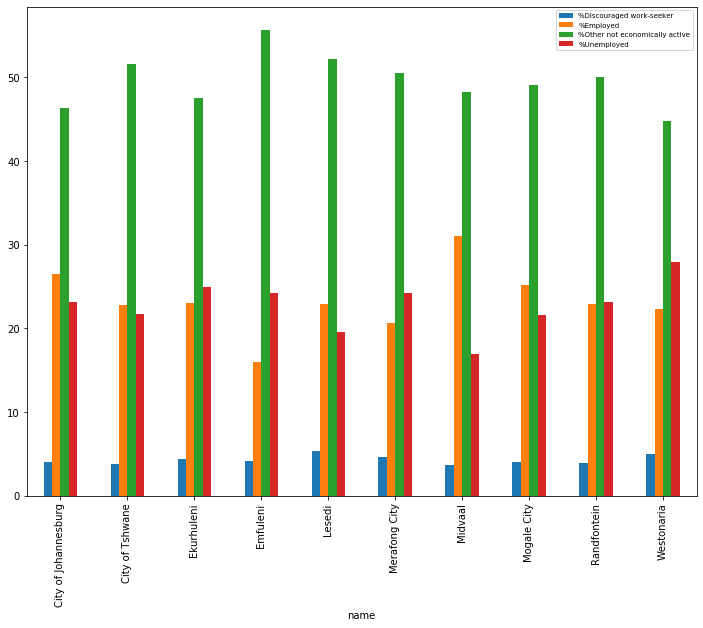

In [48]:
df_jhb_Unemp.plot.bar(subplots=False, figsize=(12, 9))
plt.legend(loc='best',fontsize=7)


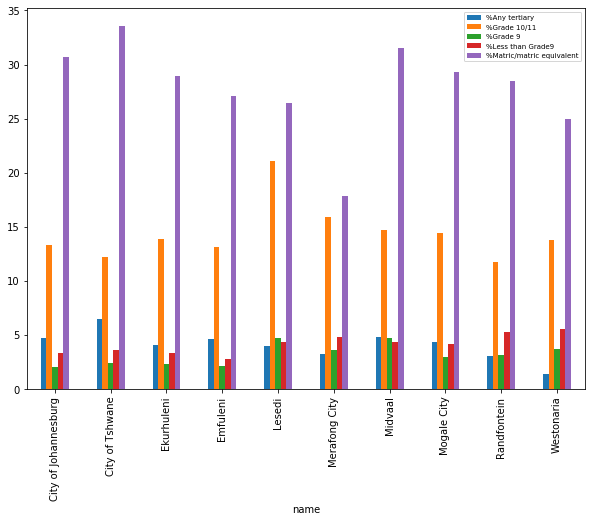

In [49]:
df_jhb_edu=df_jhb[['name','%Any tertiary','%Grade 10/11','%Grade 9','%Less than Grade9','%Matric/matric equivalent']]
df_jhb_edu.set_index('name',inplace=True)
df_jhb_edu.plot.bar(subplots=False, figsize=(10, 7))
plt.legend(loc='best',fontsize=7)

In [50]:
# get Gauteng, Gauteng Latitude and Longitude 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Gauteng'

geolocator = Nominatim(user_agent="Gauteng_explorer")
location = geolocator.geocode(address)
Gauteng_latitude = location.latitude
Gauteng_longitude = location.longitude
print('The geograpical coordinates of Gauteng are {}, {}.'.format(Gauteng_latitude, Gauteng_longitude))

The geograpical coordinates of Gauteng are -25.9363439, 28.0813105.


In [51]:
import folium
# # create map of All muncipilities in Gauteng using latitude and longitude values
Gauteng_Muncipilities = folium.Map(location=[Gauteng_latitude, Gauteng_longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(df_jhb['Latitude'], df_jhb['Longitude'], 
                           df_jhb['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Gauteng_Muncipilities)  
    
Gauteng_Muncipilities

## Data Exploration Observations
- #### It is quite obvious that overall  ratio of 'Economically not active' is highest in all Muncipilities.
- #### Muncipilities Emufuleni and Merafong City have the highest ratio of 'Unemployed'+'Economically not active' youth.
- #### Muncipility Merafong City has the lowest ratio of Matric,Grade 10,11 equivalent.
- #### Major Cities like Johannesburg,Tashwane(Includign Pretoria,Centurion) have high ratio of educated class above Matric within 2 KM distance.
- 

We will further evaluate all Muncipilities with Foursquare.

# 6- Neighbourhood Exploration with Foursquare API

In [52]:
CLIENT_ID = '4ZYLYKHCRKLNYM2P1O4DZTPDOYS5ICUCVKWD4YWA0PFB2GSB' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = '1FWHNZPDNLVK4RTIXGOTPNXAYYEGIPDQFLDNROKBRWHXDC4Z' #'your-client-secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT = 250
print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: 4ZYLYKHCRKLNYM2P1O4DZTPDOYS5ICUCVKWD4YWA0PFB2GSB
My CLIENT_SECRET:1FWHNZPDNLVK4RTIXGOTPNXAYYEGIPDQFLDNROKBRWHXDC4Z


In [53]:
radius =2000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Muncipility', 
                  'Munc_Latitude', 
                  'Munc_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [54]:
Munc_Venues = getNearbyVenues(names=df_jhb['name'],
                                   latitudes=df_jhb['Latitude'],
                                   longitudes=df_jhb['Longitude']
                                  )

City of Johannesburg
City of Tshwane
Ekurhuleni
Emfuleni
Lesedi
Merafong City
Midvaal
Mogale City
Randfontein
Westonaria


In [55]:
print ("Shape of the Venues Dataframe: ", Munc_Venues.shape)
Munc_Venues.tail()

Shape of the Venues Dataframe:  (36, 7)


,Muncipility,Munc_Latitude,Munc_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
31,Ekurhuleni,-26.184765,28.321073,Roman's Pizza,-26.169069,28.328188,Pizza Place
32,Merafong City,-26.369370,27.374104,Cassablancas,-26.363404,27.368639,Restaurant
33,Merafong City,-26.369370,27.374104,Snowy Lane,-26.358223,27.382915,Pizza Place
34,Merafong City,-26.369370,27.374104,Fiddler's Elbow Pub & Bistro,-26.355589,27.367612,Pub
35,Merafong City,-26.369370,27.374104,Blyvooruitzicht Golf Club,-26.364803,27.355270,Golf Course


In [56]:
Munc_Venues_group=Munc_Venues.groupby('Muncipility')['Venue_Category'].value_counts().to_frame(name="Count")
Munc_Venues_group

Count
Muncipility          Venue_Category              
City of Johannesburg Café                   1    
                     Gastropub              1    
                     Hostel                 1    
                     Snack Place            1    
                     Soccer Stadium         1    
City of Tshwane      BBQ Joint              1    
                     Nature Preserve        1    
Ekurhuleni           Fast Food Restaurant   3    
                     Café                   2    
                     Portuguese Restaurant  2    
                     Athletics & Sports     1    
                     Breakfast Spot         1    
                     Burger Joint           1    
                     Clothing Store         1    
                     Department Store       1    
                     Fried Chicken Joint    1    
                     Gas Station            1    
                     Grocery Store          1    
                     Gym / Fitness Center   1    
                     Indonesian Restaurant  1    
                     Italian Restaurant     1    
                     Lawyer                 1    
                     Mobile Phone Shop      1    
                     Pizza Place            1    
                     Pub                    1    
                     Seafood Restaurant     1    
                     Shopping Mall          1    
                     Train Station          1    
Merafong City        Golf Course            1    
                     Pizza Place            1    
                     Pub                    1    
                     Restaurant             1

### Above Top-4 Muncipilities have different venues within 2 KM distance,so we will restrict to only these 4 for further working

In [57]:
Munc_Venues_Top4=Munc_Venues.loc[(Munc_Venues.Muncipility=='City of Johannesburg')|(Munc_Venues.Muncipility=='City of Tshwane')|(Munc_Venues.Muncipility=='Ekurhuleni')|(Munc_Venues.Muncipility=='Merafong City')]
Munc_Venues_Top4

,Muncipility,Munc_Latitude,Munc_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,City of Johannesburg,-26.214795,27.919478,Lebo's Soweto Backpackers,-26.224562,27.913074,Hostel
1,City of Johannesburg,-26.214795,27.919478,Orlando Stadium,-26.231817,27.922740,Soccer Stadium
2,City of Johannesburg,-26.214795,27.919478,"Jabu""s Snack Bar",-26.221035,27.921825,Snack Place
3,City of Johannesburg,-26.214795,27.919478,Newcafe,-26.226791,27.927151,Café
4,City of Johannesburg,-26.214795,27.919478,Meadow Point Chisa Nyama,-26.219329,27.900553,Gastropub
5,City of Tshwane,-25.593968,28.302789,Vleise one,-25.586210,28.313360,BBQ Joint
6,City of Tshwane,-25.593968,28.302789,Buffelsdrif bewarea,-25.605703,28.316634,Nature Preserve
7,Ekurhuleni,-26.184765,28.321073,The Victorian Secret,-26.194625,28.305221,Café
8,Ekurhuleni,-26.184765,28.321073,Grapes,-26.191536,28.303342,Pub
9,Ekurhuleni,-26.184765,28.321073,Cafe Bellini,-26.192910,28.303454,Café


In [58]:
## Show Top-4 Municpilities having opportunities in Map 

map_Venues = folium.Map(location=[Gauteng_latitude, Gauteng_longitude], zoom_start=9, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on Top-4 Muncipilities
Muncipilities = ['City of Johannesburg', 'City of Tshwane', 'Ekurhuleni', 'Merafong City']

x = np.arange(len(Muncipilities))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Munc_Venues_Top4['Venue_Lat'], 
                                  Munc_Venues_Top4['Venue_Long'], 
                                  Munc_Venues_Top4['Venue_Category'], 
                                  Munc_Venues_Top4['Muncipility']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Muncipilities.index(distr)-1],
        fill=True,
        fill_color=rainbow[Muncipilities.index(distr)-1],
        fill_opacity=0.3).add_to(map_Venues)
       
map_Venues

In [59]:
##Analyze Each Neighbourhood
# Convert each category to one hot
Munc_Venues_Top4_hot = pd.get_dummies(Munc_Venues_Top4[['Venue_Category']], prefix="", prefix_sep="")
# Add neighborhood back
Munc_Venues_Top4_hot['Muncipility'] = Munc_Venues_Top4['Muncipility'] 
# move neighborhood column to the first column
Munc_Venues_Top4_hot = Munc_Venues_Top4_hot.set_index('Muncipility').reset_index()

Munc_Venues_Top4_hot.head()

,Muncipility,Athletics & Sports,BBQ Joint,Breakfast Spot,Burger Joint,Café,Clothing Store,Department Store,Fast Food Restaurant,Fried Chicken Joint,...,Nature Preserve,Pizza Place,Portuguese Restaurant,Pub,Restaurant,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Stadium,Train Station
0,City of Johannesburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,City of Johannesburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,City of Johannesburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,City of Johannesburg,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,City of Johannesburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
Munc_Venues_Top4_grouped=Munc_Venues_Top4_hot.groupby('Muncipility').mean().reset_index()
Munc_Venues_Top4_grouped

,Muncipility,Athletics & Sports,BBQ Joint,Breakfast Spot,Burger Joint,Café,Clothing Store,Department Store,Fast Food Restaurant,Fried Chicken Joint,...,Nature Preserve,Pizza Place,Portuguese Restaurant,Pub,Restaurant,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Stadium,Train Station
0,City of Johannesburg,0.00,0.0,0.00,0.00,0.20,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.2,0.2,0.00
1,City of Tshwane,0.00,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
2,Ekurhuleni,0.04,0.0,0.04,0.04,0.08,0.04,0.04,0.12,0.04,...,0.0,0.04,0.08,0.04,0.00,0.04,0.04,0.0,0.0,0.04
3,Merafong City,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.25,0.00,0.25,0.25,0.00,0.00,0.0,0.0,0.00


In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Muncipility']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Muncipility'] = Munc_Venues_Top4_grouped['Muncipility']

for ind in np.arange(Munc_Venues_Top4_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Munc_Venues_Top4_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Muncipility,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of Johannesburg,Hostel,Snack Place,Café,Gastropub,Soccer Stadium,Grocery Store,BBQ Joint,Breakfast Spot,Burger Joint,Clothing Store
1,City of Tshwane,BBQ Joint,Nature Preserve,Train Station,Gym / Fitness Center,Breakfast Spot,Burger Joint,Café,Clothing Store,Department Store,Fast Food Restaurant
2,Ekurhuleni,Fast Food Restaurant,Café,Portuguese Restaurant,Train Station,Indonesian Restaurant,Breakfast Spot,Burger Joint,Clothing Store,Department Store,Fried Chicken Joint
3,Merafong City,Restaurant,Pub,Pizza Place,Golf Course,Train Station,Grocery Store,BBQ Joint,Breakfast Spot,Burger Joint,Café


In [63]:
Munc_Venues_Top4_Trunc=Munc_Venues_Top4.drop(columns=['Venue','Venue_Lat','Venue_Long','Venue_Category'])
Munc_Venues_Top4_Trunc=Munc_Venues_Top4_Trunc.drop_duplicates()
Munc_Venues_Top4_Trunc

,Muncipility,Munc_Latitude,Munc_Longitude
0,City of Johannesburg,-26.214795,27.919478
5,City of Tshwane,-25.593968,28.302789
7,Ekurhuleni,-26.184765,28.321073
32,Merafong City,-26.369370,27.374104


## 7-K Means clustering-Top-4 Muncipilities

In [76]:
# set number of clusters
kclusters = 3

Munc_grouped_clustering = Munc_Venues_Top4_grouped.drop('Muncipility', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Munc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 2, 0], dtype=int32)

In [77]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Cluster Labels', 1)

In [78]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Munc_Venues_Top4_merged = Munc_Venues_Top4_Trunc

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Munc_Venues_Top4_merged = Munc_Venues_Top4_merged.join(neighborhoods_venues_sorted.set_index('Muncipility'), on='Muncipility')

Munc_Venues_Top4_merged # check the last columns!

,Muncipility,Munc_Latitude,Munc_Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of Johannesburg,-26.214795,27.919478,2,Hostel,Snack Place,Café,Gastropub,Soccer Stadium,Grocery Store,BBQ Joint,Breakfast Spot,Burger Joint,Clothing Store
5,City of Tshwane,-25.593968,28.302789,1,BBQ Joint,Nature Preserve,Train Station,Gym / Fitness Center,Breakfast Spot,Burger Joint,Café,Clothing Store,Department Store,Fast Food Restaurant
7,Ekurhuleni,-26.184765,28.321073,2,Fast Food Restaurant,Café,Portuguese Restaurant,Train Station,Indonesian Restaurant,Breakfast Spot,Burger Joint,Clothing Store,Department Store,Fried Chicken Joint
32,Merafong City,-26.369370,27.374104,0,Restaurant,Pub,Pizza Place,Golf Course,Train Station,Grocery Store,BBQ Joint,Breakfast Spot,Burger Joint,Café


In [79]:
# Lets check this out in the map
# create map
map_clusters=folium.Map(location=[Gauteng_latitude, Gauteng_longitude], zoom_start=9, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Munc_Venues_Top4_merged['Munc_Latitude'], Munc_Venues_Top4_merged['Munc_Longitude'], Munc_Venues_Top4_merged['Muncipility'], Munc_Venues_Top4_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [92]:
# Cluster 1
Munc_Venues_Top4_merged.loc[Munc_Venues_Top4_merged['Cluster Labels'] == 0, Munc_Venues_Top4_merged.columns[[0] + list(range(1, Munc_Venues_Top4_merged.shape[1]))]]

,Muncipility,Munc_Latitude,Munc_Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of Johannesburg,-26.214795,27.919478,0,Hostel,Snack Place,Café,Gastropub,Soccer Stadium,Gym / Fitness Center,BBQ Joint,Breakfast Spot,Burger Joint,Clothing Store


In [91]:
# Cluster 2
Munc_Venues_Top4_merged.loc[Munc_Venues_Top4_merged['Cluster Labels'] == 1, Munc_Venues_Top4_merged.columns[[0] + list(range(1, Munc_Venues_Top4_merged.shape[1]))]]

,Muncipility,Munc_Latitude,Munc_Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Ekurhuleni,-26.184765,28.321073,1,Café,Fast Food Restaurant,Portuguese Restaurant,Train Station,Indonesian Restaurant,Breakfast Spot,Burger Joint,Clothing Store,Fried Chicken Joint,Gas Station


In [93]:
# Cluster 3
Munc_Venues_Top4_merged.loc[Munc_Venues_Top4_merged['Cluster Labels'] == 2, Munc_Venues_Top4_merged.columns[[0] + list(range(1, Munc_Venues_Top4_merged.shape[1]))]]

,Muncipility,Munc_Latitude,Munc_Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,City of Tshwane,-25.593968,28.302789,2,BBQ Joint,Nature Preserve,Train Station,Gym / Fitness Center,Breakfast Spot,Burger Joint,Café,Clothing Store,Fast Food Restaurant,Fried Chicken Joint


In [94]:
# Cluster 4
Munc_Venues_Top4_merged.loc[Munc_Venues_Top4_merged['Cluster Labels'] == 3, Munc_Venues_Top4_merged.columns[[0] + list(range(1, Munc_Venues_Top4_merged.shape[1]))]]

,Muncipility,Munc_Latitude,Munc_Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Merafong City,-26.36937,27.374104,3,Restaurant,Pub,Music Venue,Golf Course,Train Station,Grocery Store,BBQ Joint,Breakfast Spot,Burger Joint,Café


## Result

By Distributing muncipilities in 3 Clusters,it is visible that City of Johannebsurg,Ekurhulani have most Opputunities within 2 KM for Unemployed.
